# Automatyczne pozyskiwanie danych

## Tomasz Rodak

Wykład 4

---

## Grafy

<!-- Graf to matematyczny obiekt składający się z dwóch podstawowych elementów: zbioru wierzchołków (nazywanych także punktami) oraz zbioru krawędzi, czyli połączeń między tymi wierzchołkami. Definiujemy graf jako parę \( G = (V, E) \), gdzie \( V \) jest niepustym zbiorem wierzchołków, a \( E \) – zbiorem krawędzi, które łączą pary wierzchołków. -->

Graf to matematyczny obiekt składający się z dwóch podstawowych elementów: zbioru wierzchołków (nazywanych także węzłami) oraz zbioru krawędzi, czyli połączeń między tymi wierzchołkami. Definiujemy graf jako parę $G = (V, E)$, gdzie $V$ jest niepustym zbiorem wierzchołków, a $E$ – zbiorem krawędzi, które łączą pary wierzchołków. 

### Graf nieskierowany

W grafie nieskierowanym każda krawędź łączy dwa wirzchołki (mogą być te same) w sposób symetryczny, co oznacza, że nie ma określonego kierunku między wierzchołkami. Krawędź między wierzchołkami $u$ i $v$ reprezentowana jest jako nieuporządkowana para $\{u, v\}$. Oznacza to, że jeśli istnieje krawędź między $u$ a $v$, to można przejść zarówno z $u$ do $v$, jak i z $v$ do $u$. 

### Graf skierowany

W grafie skierowanym każda krawędź posiada określony kierunek. Krawędź między wierzchołkami $u$ i $v$ reprezentowana jest jako uporządkowana para $(u, v)$, gdzie $u$ nazywany jest wierzchołkiem początkowym, a $v$ – końcowym. Oznacza to, że połączenie (czy też relacja) jest jednostronne – istnienie krawędzi od $u$ do $v$ nie implikuje automatycznie istnienia krawędzi od $v$ do $u$.

### Networkx

NetworkX to biblioteka Pythona, do tworzenia i analizy grafów.  

Przykład grafu nieskierowanego:

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

Przykład grafu nieskierowanego:

In [2]:
graph = nx.Graph()
graph.add_nodes_from([1, 2, 3])
graph.add_edges_from([(1, 2), (2, 3), (3, 1)])
graph.add_node(4)
graph.add_edge(1, 4)
graph.nodes, graph.edges

(NodeView((1, 2, 3, 4)), EdgeView([(1, 2), (1, 3), (1, 4), (2, 3)]))

Dane grafu w formacie gotowym do przekazania do pliku json:

In [3]:
nx.node_link_data(graph)

{'directed': False,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': 1}, {'id': 2}, {'id': 3}, {'id': 4}],
 'links': [{'source': 1, 'target': 2},
  {'source': 1, 'target': 3},
  {'source': 1, 'target': 4},
  {'source': 2, 'target': 3}]}

Obrazek:

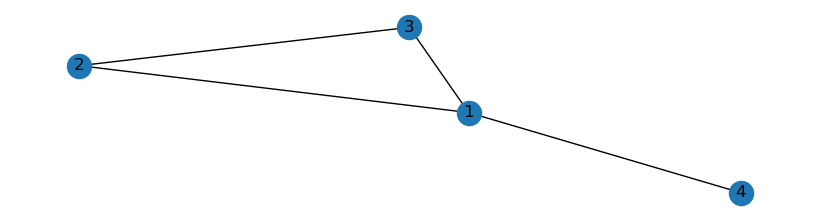

In [4]:
nx.draw(graph, with_labels=True)
plt.gcf().set_size_inches(8, 2)

Sąsiedzi wierzchołka:

In [5]:
list(graph.neighbors(1))

[2, 3, 4]

Przyklad grafu skierowanego:

In [6]:
graph = nx.DiGraph()
graph.add_nodes_from([1, 2, 3])
graph.add_edges_from([(1, 2), (2, 3), (3, 1)])
graph.add_node(4)
graph.add_edge(1, 4)
graph.nodes, graph.edges

(NodeView((1, 2, 3, 4)), OutEdgeView([(1, 2), (1, 4), (2, 3), (3, 1)]))

Dane grafu w formacie gotowym do przekazania do pliku json:

In [7]:
nx.node_link_data(graph)

{'directed': True,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': 1}, {'id': 2}, {'id': 3}, {'id': 4}],
 'links': [{'source': 1, 'target': 2},
  {'source': 1, 'target': 4},
  {'source': 2, 'target': 3},
  {'source': 3, 'target': 1}]}

Obrazek:

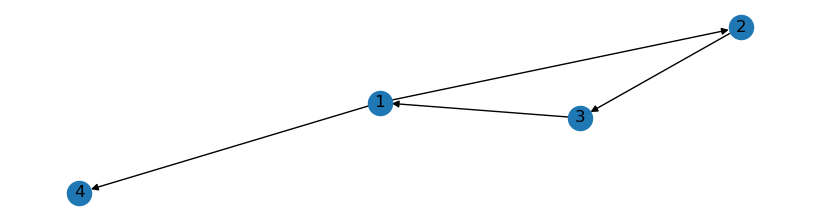

In [8]:
nx.draw(graph, with_labels=True)
plt.gcf().set_size_inches(8, 2)

Sąsiedzi wierzchołka:

In [9]:
list(graph.neighbors(1))

[2, 4]

Losowy graf skierowany:

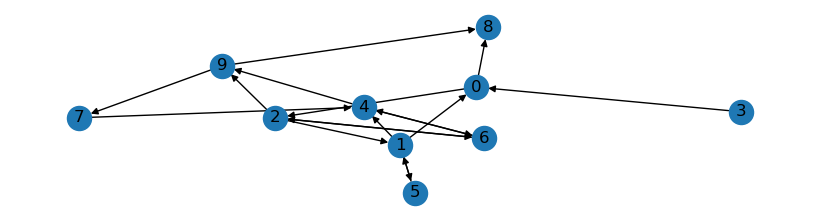

In [10]:
graph = nx.erdos_renyi_graph(10, 0.2, directed=True, seed=42)
nx.draw(graph, with_labels=True)
plt.gcf().set_size_inches(8, 2)

Sąsiedzi wierzchołka:

In [11]:
list(graph.neighbors(2))

[1, 6, 9]

### Przykład

[Tutaj](https://github.com/rodakt/APD/tree/main/graph_server) znajduje się przykład prostego serwera, w którym węzły powyższego grafu są reprezentowane jako strony HTML. Odnośniki między nimi odpowiadają krawędziom grafu. 

### Przeszukiwanie grafu

#### *Breadth-First Search* (BFS)

BFS odwiedza wszystkie wierzchołki na danym poziomie odległości od wierzchołka startowego, zanim przejdzie do wierzchołków położonych dalej. Działa na grafach obu typów.

Wykorzystuje:
* kolejkę FIFO (First-In-First-Out) do zapamiętywania, które wierzchołki należy odwiedzić w następnej kolejności,
* zbiór, do rejestracji historii odwiedzonych wierzchołków.

**Algorytm:**

```
funkcja BFS(graf, wierzchołek_startowy):
    // Inicjalizacja
    kolejka = nowa Kolejka()
    odwiedzone = nowy Zbiór()
    
    // Dodaj wierzchołek startowy do kolejki i oznacz jako odwiedzony
    kolejka.dodaj(wierzchołek_startowy)
    odwiedzone.dodaj(wierzchołek_startowy)
    
    // Główna pętla BFS
    dopóki kolejka nie jest pusta:
        aktualny = kolejka.pobierz()  // Pobierz pierwszy element z kolejki
        
        // Przetwórz aktualny wierzchołek (np. wyświetl)
        przetwórz(aktualny)
        
        // Sprawdź wszystkich sąsiadów aktualnego wierzchołka
        dla każdego sąsiada w graf.sąsiedzi(aktualny):
            jeżeli sąsiad nie należy do odwiedzone:
                kolejka.dodaj(sąsiad)
                odwiedzone.dodaj(sąsiad)
```

#### Kolejka FIFO

Kolejka FIFO (First-In-First-Out) to struktura danych, która działa na zasadzie "pierwszy wszedł, pierwszy wyszedł". Oznacza to, że elementy są dodawane na końcu kolejki i usuwane z początku. Stosuje się do tego operacje:
* `enqueue` – dodaje element na końcu kolejki,
* `dequeue` – usuwa element z początku kolejki i zwraca go.

W Pythonie implementację kolejki FIFO stanowi lista z operacjami:
* `append` – dodaje element na końcu listy,
* `pop(0)` – usuwa element z początku listy i zwraca go.

Listy jako kolejki są nieefektywne, ponieważ operacja `pop(0)` wymaga przesunięcia wszystkich pozostałych elementów w lewo i ma złożoność czasową $O(n)$, gdzie $n$ to liczba elementów w liście. Bardziej efektywne jest użycie modułu `collections.deque` z konstruktorem `deque()` i operacjami:
* `append` – dodaje element na końcu kolejki,
* `popleft` – usuwa element z początku kolejki i zwraca go.

### Ćwiczenie

Napisz funkcję `bfs(graph, start)`, która przyjmuje graf i wierzchołek startowy, a następnie zwraca listę odwiedzonych wierzchołków w kolejności ich odwiedzenia. Użyj algorytmu BFS. 